### Step 1: Package Import and Understanding Dataset

In [79]:
# Importing necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [80]:
# lets import and read the dataset

ev_df =pd.read_csv(r"D:\Internship\fynne lab\ev_motor\EV_Vehicle_Market_India\Data_Collection\charging_station\ev-charging-stations-india.csv")
ev_df.head(10)





,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0
5,Krishna Hansraj Hotel Una DC charging station,Himachal Pradesh,Una,"Old Hoshiarpur Rd, Una, Himachal Pradesh 174303",31.4668,76.2568,12.0
6,SG Jabli DC Charging Station,Himachal Pradesh,Kasauli,"VPO - Jabli, NH-22, Teh, Kasauli, Himachal Pra...",30.8790,76.9948,12.0
7,SG Jabli AC Charging Station,Himachal Pradesh,Kasauli,"VPO - Jabli, NH-22, Teh, Kasauli, Himachal Pra...",30.8790,76.9948,12.0
8,SG Karnal DC Charging Station,Haryana,Karnal,"131 km Milestone, G. T, GT Karnal Rd, near Kar...",29.7379,76.9756,12.0
9,SG Karnal AC Charging Station,Haryana,Karnal,"131 km Milestone, G. T, GT Karnal Rd, near Kar...",29.7379,76.9756,12.0


In [81]:
ev_df.shape

(1547, 7)

In [82]:
ev_df.columns

Index(['name', 'state', 'city', 'address', 'lattitude', 'longitude', 'type'], dtype='object')

In [83]:
ev_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   float64
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(3), object(4)
memory usage: 84.7+ KB


### Step 2: Data Preprocessing

#### Lattitude Datatype from Object to Float64

In [84]:
ev_df['lattitude'] = ev_df['lattitude'].astype('float64')

In [85]:
ev_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   float64
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(3), object(4)
memory usage: 84.7+ KB


#### Standardizing State List 

In [86]:
ev_df['state'].value_counts()

state
Maharashtra          259
Tamil Nadu           155
Karnataka            134
Delhi                126
Kerala                91
Uttar Pradesh         87
Gujarat               77
Telangana             75
Rajasthan             68
Haryana               60
Delhi NCR             53
West Bengal           53
Odisha                38
Andhra Pradesh        31
Andhra pradesh        24
Jharkhand             22
Uttarakhand           21
TAMIL NADU            20
Madhya Pradesh        20
Punjab                15
Chhattisgarh          12
Assam                 10
Bihar                  9
PUNJAB                 9
Goa                    8
TamilNadu              7
Himachal Pradesh       6
Maharashra             5
TELENGANA              5
Chattisgarh            4
Jammu & Kashmir        3
Jammu                  3
WestBengal             3
Uttrakhand             2
Puducherry             2
Andra Pradesh          2
Sikkim                 2
Uttarakhand            2
chattisgarh            2
Chandigarh         

In [87]:
# Function to capitalize only the first letter of each word and convert all others to lowercase
def capitalize_first_letter(word):
    return ' '.join([w.capitalize() for w in word.split()])

# Apply the function to the 'state' column
ev_df['state'] = ev_df['state'].apply(capitalize_first_letter)

In [88]:
import pandas as pd
import difflib

# Standardized state names
standard_states = [
    'Maharashtra', 'Gujarat', 'Uttar Pradesh', 'Karnataka', 'Rajasthan',
    'Kerala', 'Tamil Nadu', 'Andhra Pradesh', 'Telangana', 'Madhya Pradesh',
    'West Bengal', 'Haryana', 'Bihar', 'Punjab', 'Odisha', 'Assam',
    'Chhattisgarh', 'Jharkhand', 'Uttarakhand', 'Jammu and Kashmir',
    'Himachal Pradesh', 'Goa', 'Tripura', 'Manipur', 'Meghalaya', 'Nagaland',
    'Arunachal Pradesh', 'Sikkim', 'Mizoram', 'Andaman and Nicobar Islands',
    'Chandigarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Lakshadweep',
    'Delhi', 'Puducherry', 'Ladakh', ]

# Function to find the closest match from the standardized states list
def get_closest_match(state):
    matches = difflib.get_close_matches(state, standard_states, n=1)
    if matches:
        return matches[0]
    else:
        return state  # Return the original state if no close match is found

    # Apply the function to standardize state names
ev_df['state'] = ev_df['state'].apply(get_closest_match)


In [89]:
ev_df['state'].value_counts()

state
Maharashtra          264
Tamil Nadu           183
Delhi                179
Karnataka            134
Kerala                92
Uttar Pradesh         87
Telangana             80
Gujarat               77
Rajasthan             69
Haryana               61
Andhra Pradesh        59
West Bengal           56
Odisha                38
Uttarakhand           26
Punjab                24
Jharkhand             22
Madhya Pradesh        20
Chhattisgarh          18
Assam                 10
Bihar                 10
Goa                    8
Himachal Pradesh       6
Jammu and Kashmir      4
Puducherry             3
Jammu                  3
Chandigarh             2
Sikkim                 2
Manipur                1
Tripura                1
Limbdi                 1
Kochi                  1
Hyderabadu00a0         1
Hyderabad              1
Ernakulam              1
Chikhali               1
Bhubhaneswar           1
Andaman                1
Name: count, dtype: int64

#### Standardizing City Names 

In [90]:
ev_df['city'] = ev_df['city'].apply(lambda x: x.capitalize())

In [91]:
# Mapping dictionary
city_mapping = {
    'New Delhi': ['New Delhi', 'Delhi', 'New delhi'],
    'Bengaluru': ['Bangalore', 'Banglore', 'Bengaluru'],
    'Gurugram': ['Gurugram', 'Gurgaon']
}

# Function to map cities
def map_cities(city):
    for key, values in city_mapping.items():
        if city in values:
            return key
    return city

# Applying the mapping function to the 'city' column
ev_df['city'] = ev_df['city'].apply(map_cities)

#### Rounding off values of Latitude and Longitude

In [92]:
# Round latitude and longitude values to 6 decimal places
ev_df['lattitude'] = ev_df['lattitude'].round(6)
ev_df['longitude'] = ev_df['longitude'].round(6)

In [93]:
# Summary statistics
summary_stats = ev_df.describe()
print(summary_stats)

         lattitude     longitude         type
count  1541.000000  1.541000e+03  1539.000000
mean     19.979926  1.105323e+05     9.020793
std       7.125371  3.064996e+06     4.136436
min       8.390198  8.058454e+00     6.000000
25%      13.041390  7.562036e+01     7.000000
50%      19.106318  7.721257e+01     7.000000
75%      26.900894  7.847983e+01    11.000000
max      78.065400  8.510551e+07    24.000000


#### New column 'charging type' from 'name' column

In [94]:
# Function to derive Charging Type
def derive_charging_type(name):
    if 'AC' in name:
        return 'AC'
    elif 'DC' in name:
        return 'DC'
    else:
        return 'Unknown'  # or any other value you want to assign for cases where neither 'AC' nor 'DC' is present

# Applying the function to create the new column
ev_df['Charging Type'] = ev_df['name'].apply(derive_charging_type)

In [95]:
ev_df.head()

,name,state,city,address,lattitude,longitude,type,Charging Type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0,DC
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0,DC
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0,DC
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0,DC
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0,AC


In [96]:
ev_df['Charging Type'].value_counts()

Charging Type
Unknown    1451
DC           65
AC           31
Name: count, dtype: int64

#### Null values check 

In [97]:
# Check for null values in each column
null_values_per_column = ev_df.isnull().sum()
null_values_per_column

name              0
state             0
city              0
address          40
lattitude         6
longitude         6
type              8
Charging Type     0
dtype: int64

In [98]:
# Drop rows with null values in 'longitude', 'latitude', and 'type' columns
ev_df = ev_df.dropna(subset=['longitude', 'lattitude', 'type'])


# Fill null values in 'address' column with combined 'city' and 'state'
ev_df['address'].fillna(ev_df['city'] + ', ' + ev_df['state'], inplace=True)

In [99]:
# Check for null values in each column again
null_values_per_column = ev_df.isnull().sum()
null_values_per_column

name             0
state            0
city             0
address          0
lattitude        0
longitude        0
type             0
Charging Type    0
dtype: int64

In [100]:
ev_df.shape

(1533, 8)

### Duplicate entries check

In [101]:
# Check for duplicate rows
duplicate_rows = ev_df[ev_df.duplicated()]

print(duplicate_rows , len(duplicate_rows))


                                                name        state  \
555                            Oberoi Mall, Goregaon  Maharashtra   
579   The Grand Legacy, Panchgani-Mahabaleshwar Road  Maharashtra   
830                          EESL High court station   Tamil Nadu   
832                        EESL Chennai Egmore metro   Tamil Nadu   
837                             EESL Chelmsford Club        Delhi   
...                                              ...          ...   
1441                        IOCL Drive-In, Belgachia  West Bengal   
1443                  Hotel Artland, Old Digha Purba  West Bengal   
1444          IOCL - PIONEER AUTO SERVICE, Bagdogara  West Bengal   
1455                             Magenta TTC, Turbhe  Maharashtra   
1458                             Magenta TTC, Turbhe  Maharashtra   

               city                                            address  \
555          Mumbai  Western Express Hwy, Yashodham, Goregaon, Mumb...   
579   Mahabaleshwar  Pa

In [102]:
# Remove duplicate rows
ev_df = ev_df.drop_duplicates()
ev_df.shape

(1280, 8)

#### Outliers Detectiona nd Removal

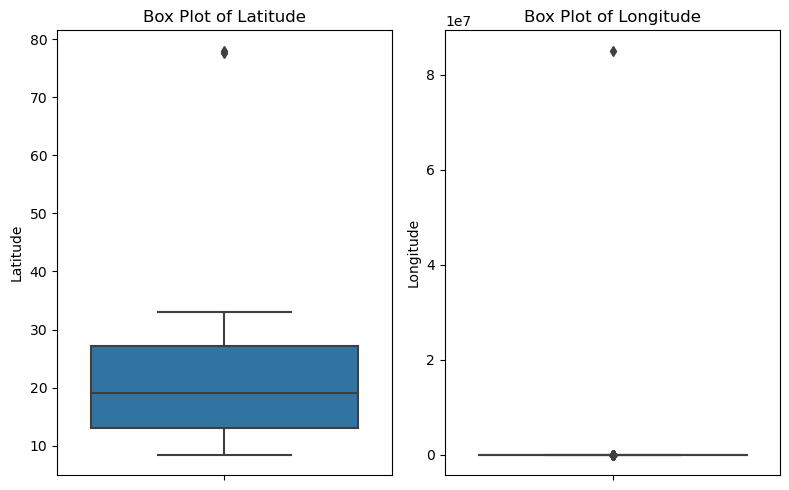

In [103]:
# looking for outliers in latitude and longitude columns

plt.figure(figsize=(8, 5))

# Box plot for Latitude
plt.subplot(1, 2, 1)
sns.boxplot(data=ev_df, y='lattitude')
plt.ylabel('Latitude')
plt.title('Box Plot of Latitude')

# Box plot for Longitude
plt.subplot(1, 2, 2)
sns.boxplot(data=ev_df, y='longitude')
plt.ylabel('Longitude')
plt.title('Box Plot of Longitude')

plt.tight_layout()
plt.show()

In [104]:
# Calculate the first and third quartiles
Q1_latitude = ev_df['lattitude'].quantile(0.03)
Q3_latitude = ev_df['lattitude'].quantile(0.97)
Q1_longitude = ev_df['longitude'].quantile(0.03)
Q3_longitude = ev_df['longitude'].quantile(0.97)

# Calculate the IQR for latitude and longitude
IQR_latitude = Q3_latitude - Q1_latitude
IQR_longitude = Q3_longitude - Q1_longitude

# Define the outlier step as 1.5 times the IQR
outlier_step_latitude = 1.5 * IQR_latitude
outlier_step_longitude = 1.5 * IQR_longitude

# Filter rows where latitude and longitude values are within the acceptable range
filtered_ev_df = ev_df[
    (ev_df['lattitude'] >= Q1_latitude - outlier_step_latitude) &
    (ev_df['lattitude'] <= Q3_latitude + outlier_step_latitude) &
    (ev_df['longitude'] >= Q1_longitude - outlier_step_longitude) &
    (ev_df['longitude'] <= Q3_longitude + outlier_step_longitude)
]

In [105]:
ev_df = filtered_ev_df

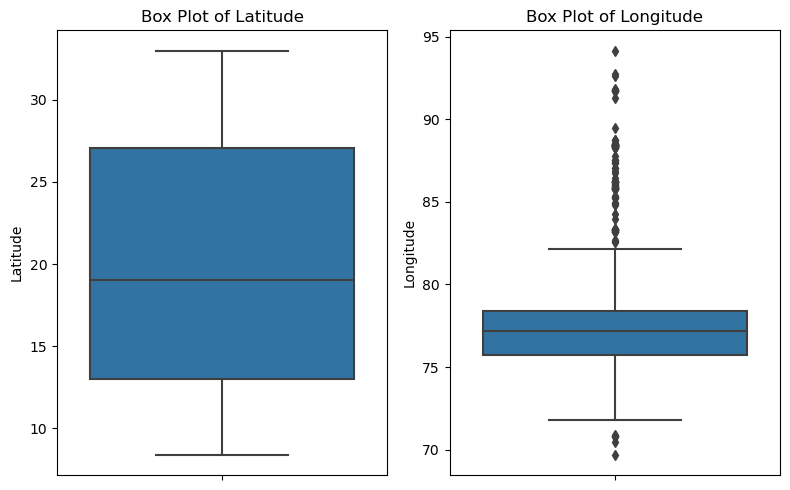

In [106]:
# Check for outliers in latitude and longitude columns

plt.figure(figsize=(8, 5))

# Box plot for Latitude
plt.subplot(1, 2, 1)
sns.boxplot(data=ev_df, y='lattitude')
plt.ylabel('Latitude')
plt.title('Box Plot of Latitude')

# Box plot for Longitude
plt.subplot(1, 2, 2)
sns.boxplot(data=ev_df, y='longitude')
plt.ylabel('Longitude')
plt.title('Box Plot of Longitude')

plt.tight_layout()
plt.show()

### Step 3: Exploratory Data Analysis(EDA)

### State column

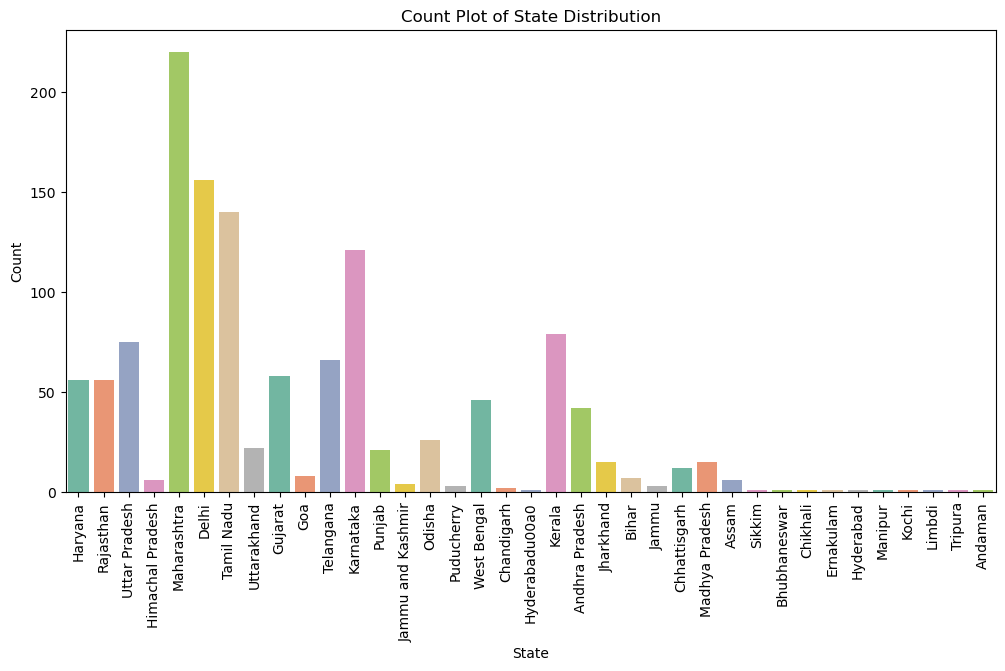

In [107]:
# Count plot with vertical labels
plt.figure(figsize=(12, 6))
sns.countplot(data=ev_df, x='state', palette='Set2')
plt.title('Count Plot of State Distribution')
plt.xlabel('State')
plt.ylabel('Count')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()

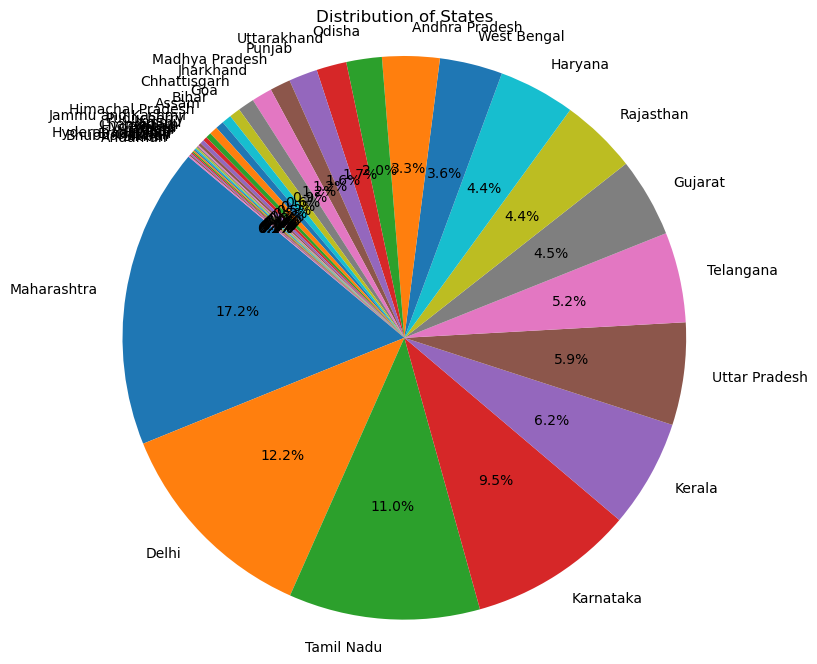

In [108]:
state_counts = ev_df['state'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of States')
plt.show()

### City column values

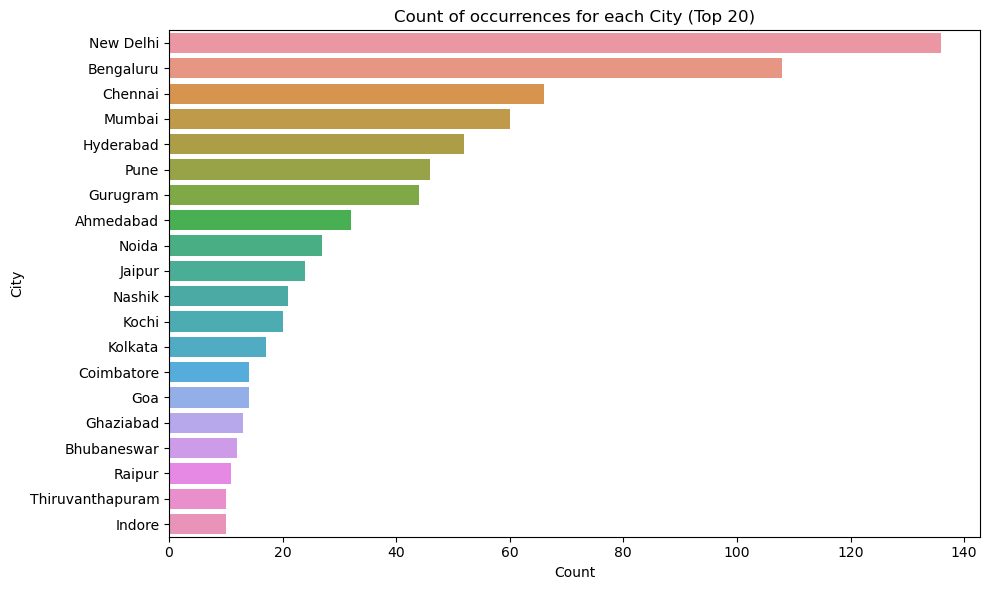

In [109]:
# city' is the column name in DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(data=ev_df, y='city', order=ev_df['city'].value_counts().index[:20])
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count of occurrences for each City (Top 20)')
plt.tight_layout()
plt.show()

### State Vs City

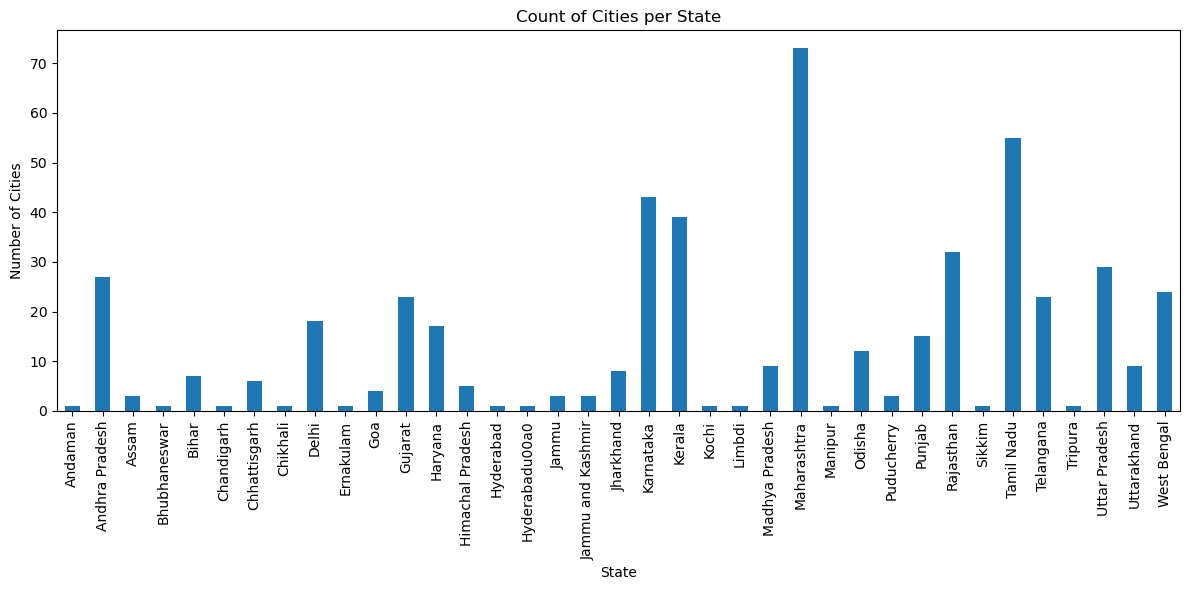

In [110]:
#'state' and 'city' are column names in DataFrame
state_city_counts = ev_df.groupby('state')['city'].nunique()

plt.figure(figsize=(12, 6))
state_city_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Cities')
plt.title('Count of Cities per State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### India EV Charging stations on Map

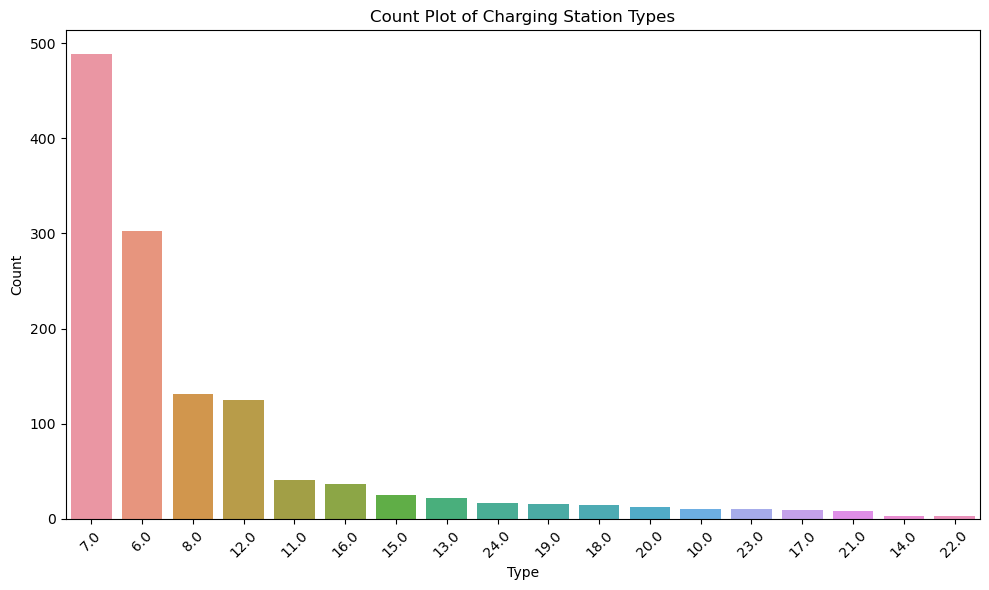

In [112]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ev_df, x='type', order=ev_df['type'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count Plot of Charging Station Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

### Charging station type Vs State

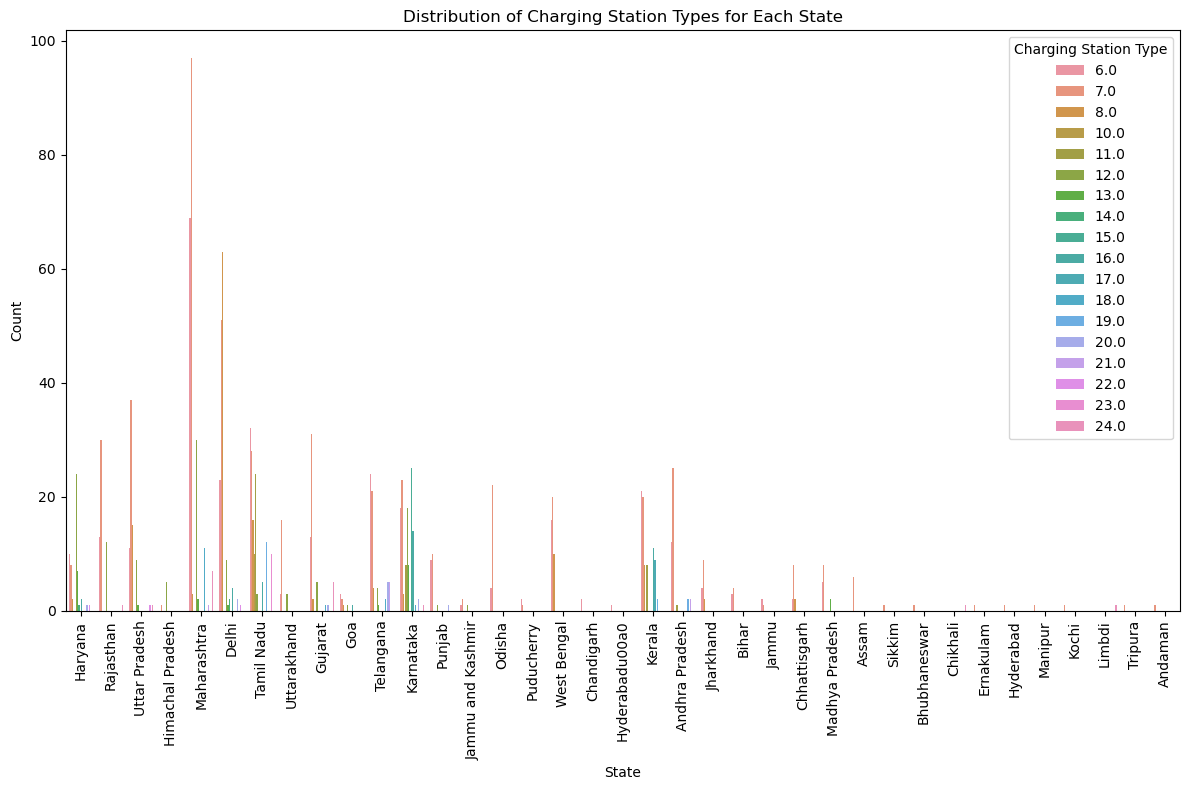

In [113]:
plt.figure(figsize=(12, 8))

# Create the count plot
sns.countplot(data=ev_df, x='state', hue='type')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Charging Station Types for Each State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Charging Station Type')
plt.tight_layout()
plt.show()

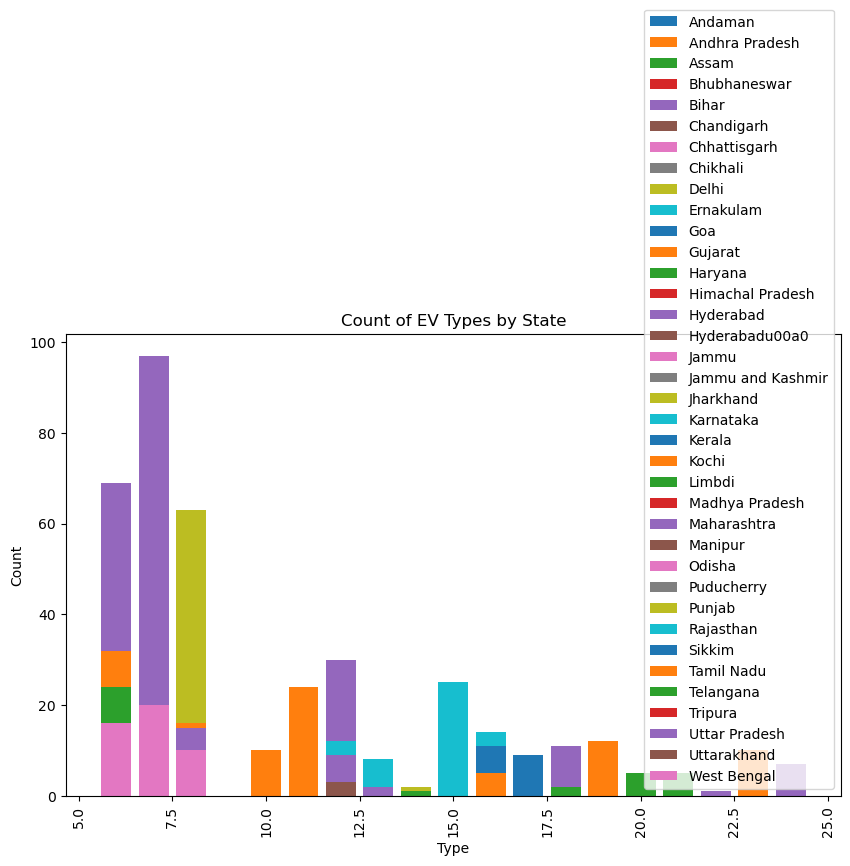

In [114]:
# Grouping data by state and type, then counting occurrences of each type within each group
grouped_data = ev_df.groupby(['state', 'type']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each state group
for state, group in grouped_data.groupby('state'):
    plt.bar(group['type'], group['count'], label=state)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of EV Types by State')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.legend()
plt.show()


### Feature Engineering: 
- Creating Dummy varibles for categorical columns - One-hot Encoding

In [115]:
# Perform one-hot encoding for 'state'
state_dummies = pd.get_dummies(ev_df['state'], prefix='state', drop_first=True)

# Perform one-hot encoding for 'city'
city_dummies = pd.get_dummies(ev_df['city'], prefix='city', drop_first=True)

# Concatenate dummy variables with original dataframe
ev_df_encoded = pd.concat([ev_df, state_dummies, city_dummies], axis=1)

# Drop the original categorical columns
ev_df_encoded.drop(['state', 'city'], axis=1, inplace=True)

In [116]:
ev_df = ev_df_encoded.drop(['name', 'address', 'Charging Type'], axis=1)

### Standard Scaler and PCA with cumulative variance

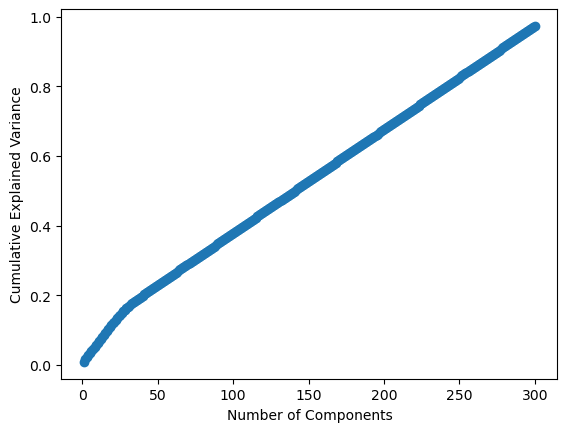

In [117]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ev_df)

pca = PCA(n_components=300)
pca.fit(scaled_features)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [118]:
scaled_features

array([[ 1.4411154 , -0.14107543,  0.73207837, ..., -0.03962144,
        -0.03962144, -0.0280056 ],
       [ 1.27331255, -0.11337363,  0.73207837, ..., -0.03962144,
        -0.03962144, -0.0280056 ],
       [ 1.18572851, -0.33329591,  0.73207837, ..., -0.03962144,
        -0.03962144, -0.0280056 ],
       ...,
       [ 1.26499665, -0.12463285, -0.48487317, ..., -0.03962144,
        -0.03962144, -0.0280056 ],
       [ 1.90026043, -0.71451555, -0.48487317, ..., -0.03962144,
        -0.03962144, -0.0280056 ],
       [-1.03114205, -0.72426631, -0.48487317, ..., -0.03962144,
        -0.03962144, -0.0280056 ]])

In [119]:
ev_df.head(10)

,lattitude,longitude,type,state_Andhra Pradesh,state_Assam,state_Bhubhaneswar,state_Bihar,state_Chandigarh,state_Chhattisgarh,state_Chikhali,...,city_Vapi,city_Vasai-virar,city_Vellore,city_Vijayawada,city_Villupuram,city_Visakhapatnam,city_Vizag,city_Walayar,city_Yediyur,city_Yelur
0,29.6019,76.9803,12.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.4673,77.0818,12.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,27.8751,76.2760,12.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,29.3105,77.7218,12.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,29.3105,77.7218,12.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,31.4668,76.2568,12.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,30.8790,76.9948,12.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,30.8790,76.9948,12.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,29.7379,76.9756,12.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,29.7379,76.9756,12.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Modelling: K-Means Algorithm

#### Silhouette Score and scree plot

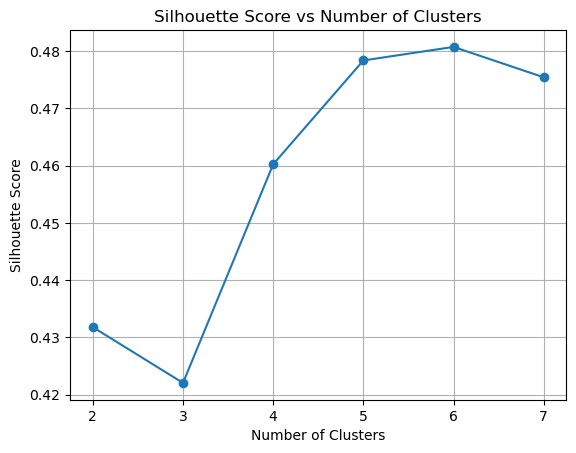

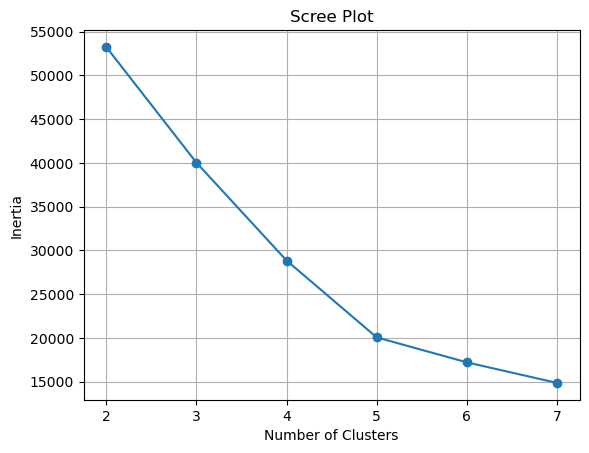

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Creating a list to store silhouette scores
silhouette_scores = []

# Creating a list to store inertia values
inertia_values = []

# Defining the range of clusters
k_range = range(2, 8)

# Iterate through each number of clusters
for k in k_range:
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the data
    kmeans.fit(ev_df)  
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(ev_df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Append the inertia to the list
    inertia_values.append(kmeans.inertia_)

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Plot the scree plot
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot')
plt.xticks(k_range)
plt.grid(True)
plt.show()


### K-means with 5 Clusters

In [121]:
# number of clusters
n_clusters = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(ev_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
ev_df['cluster'] = cluster_labels

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[ 2.86394559e+01  7.71179756e+01  8.64917127e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.22136579e+01  7.78927648e+01  7.69578313e+00 ...  6.02409639e-03
   6.02409639e-03 -6.50521303e-19]
 [ 1.43608233e+01  7.69449901e+01  1.83687943e+01 ...  8.67361738e-19
   8.67361738e-19  4.33680869e-19]
 [ 1.94244171e+01  7.44725368e+01  7.37267081e+00 ... -1.30104261e-18
  -1.30104261e-18  3.10559006e-03]
 [ 2.21561629e+01  8.63859334e+01  6.92436975e+00 ... -4.33680869e-19
  -4.33680869e-19 -2.16840434e-19]]


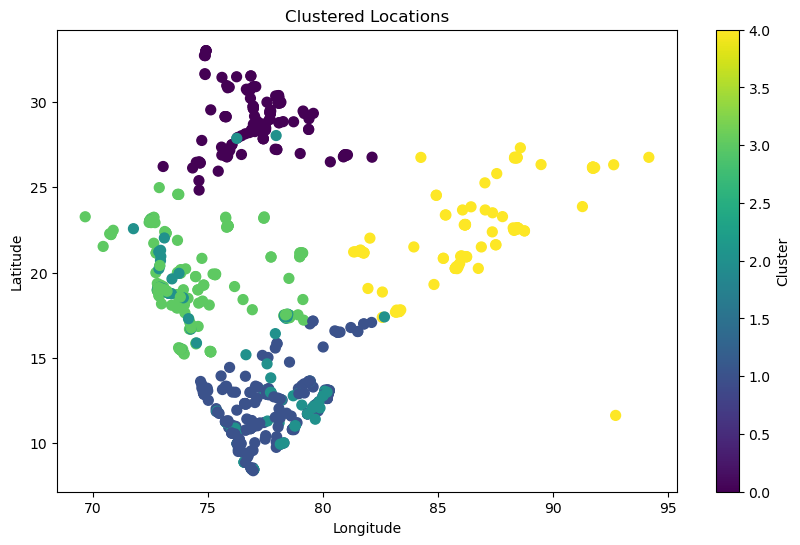

In [122]:
import matplotlib.pyplot as plt

# Plot clusters on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ev_df['longitude'], ev_df['lattitude'], c=ev_df['cluster'], cmap='viridis', s=50)
plt.title('Clustered Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()
